(c) Karen Belita  <br /> 
Team Neighborhood Change <br /> 
Last Updated 9/7/2016 <br /> 

# NOTEBOOK: FEATURES & VISUALIZATIONS
To create a few visualizations to see which features to use for machine learning - unsupervised learning

### OUTPUT
* visualizations

### DEPENDENCIES

indicators.csv --  which has a list of all features from the PostgreSQL database

In [1]:
import pandas as pd
import os 
import csv
import xlrd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler, Normalizer


import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline 

### Part 1
* read indicators.csv
* check column names
* make a list of column names for later
* look at summary statistic before imputation
* in dataframe 'df' drop columns that are not features
* replace all nans with white space


In [9]:
df = pd.read_csv('indicators.csv')

In [10]:
df.head()

,id,cbsa,msa_name,violent_crime_rate,murder_manslaughter,rape,robbery,aggravated_assault,property_crime_rate,burglary,...,fatalities_mpmt,injuries_mpmt,walk_score,transit_score,bike_score,unemploymentrate,employment,laborforce,compositescore,memo
0,0,35620,New York-Newark-Jersey City NY-NJ-PA Metro Are...,371.4,3.1,16.6,135.3,216.3,1609.9,220.8,...,0.005243,0.396239,74.500000,44.833333,30.333333,6.4,9324454.0,9965273.0,NaN,NaN
1,1,31080,Los Angeles-Long Beach-Anaheim CA Metro Area ...,368.9,4.4,21.6,136.6,206.2,2050.4,402.8,...,0.004415,0.345391,60.052632,19.368421,24.000000,NaN,NaN,NaN,NaN,NaN
2,2,16980,Chicago-Naperville-Elgin IL-IN-WI Metro Area ...,380.1,6.3,28.2,143.3,202.2,2135.4,361.7,...,0.004533,0.708461,49.700000,20.300000,7.000000,7.1,4540001.0,4888002.0,NaN,NaN
3,3,19100,Dallas-Fort Worth-Arlington TX Metro Area ...,332.9,4.4,31.8,120.8,175.8,3036.4,NaN,...,0.006083,0.583938,38.714286,19.714286,26.285714,5.0,3357271.0,3534675.0,NaN,NaN
4,4,26420,Houston-The Woodlands-Sugar Land TX Metro Area...,567.4,5.8,33.2,232.2,296.1,3208.1,688.6,...,0.001631,0.724259,29.000000,7.400000,9.800000,5.0,3079095.0,3239227.0,NaN,NaN


In [11]:
(df.columns.values) ## LISTS COLUMN NAMES

array(['id', 'cbsa', 'msa_name', 'violent_crime_rate',
       'murder_manslaughter', 'rape', 'robbery', 'aggravated_assault',
       'property_crime_rate', 'burglary', 'larceny_theft',
       'motor_vehicle_theft', 'total_crime_rate', 'median_gross_rent',
       'median_monthly_mortgage', 'rent_burden', 'mortgage_burden',
       'income_change_2012_to_2014', 'median_age_of_men',
       'median_age_of_women', 'median_age', 'median_household_income',
       'single_men_population', 'single_women_population',
       'ratio_of_single_men_to_single_women',
       'population_percent_of_single_men',
       'population_percent_of_single_women', 'population',
       'edu_average_scale_score', 'pct_laccess_pop10',
       'pct_laccess_lowi10', 'pct_laccess_child10',
       'pct_laccess_seniors10', 'pct_laccess_hhnv10', 'event_mpmt',
       'fatalities_mpmt', 'injuries_mpmt', 'walk_score', 'transit_score',
       'bike_score', 'unemploymentrate', 'employment', 'laborforce',
       'compositescore

### COLUMN NAMES 
['id',
 'cbsa',
 'msa_name',
 'violent_crime_rate',
 'murder_manslaughter',
 'rape',
 'robbery',
 'aggravated_assault',
 'property_crime_rate',
 'burglary',
 'larceny_theft',
 'motor_vehicle_theft',
 'total_crime_rate',
 'median_gross_rent',
 'median_monthly_mortgage',
 'rent_burden',
 'mortgage_burden',
 'income_change_2012_to_2014',
 'median_age_of_men',
 'median_age_of_women',
 'median_age',
 'median_household_income',
 'single_men_population',
 'single_women_population',
 'ratio_of_single_men_to_single_women',
 'population_percent_of_single_men',
 'population_percent_of_single_women',
 'population',
 'edu_average_scale_score',
 'pct_laccess_pop10',
 'pct_laccess_lowi10',
 'pct_laccess_child10',
 'pct_laccess_seniors10',
 'pct_laccess_hhnv10',
 'event_mpmt',
 'fatalities_mpmt',
 'injuries_mpmt',
 'walk_score',
 'transit_score',
 'bike_score',
 'unemploymentrate',
 'employment',
 'laborforce',
 'compositescore',
 'memo']

### SUMMARY STATISTICS

In [12]:
df.describe()

,id,cbsa,violent_crime_rate,murder_manslaughter,rape,robbery,aggravated_assault,property_crime_rate,burglary,larceny_theft,...,fatalities_mpmt,injuries_mpmt,walk_score,transit_score,bike_score,unemploymentrate,employment,laborforce,compositescore,memo
count,300.000000,300.000000,285.000000,285.000000,285.000000,285.000000,285.000000,282.000000,263.000000,284.000000,...,208.000000,208.000000,300.000000,300.000000,300.000000,283.000000,2.830000e+02,2.830000e+02,0.0,0.0
mean,149.500000,29944.500000,369.561754,4.448070,38.274035,83.702456,243.510526,2811.203546,595.874144,2005.261972,...,0.005137,1.038757,40.123874,8.847157,13.443263,6.319788,4.039966e+05,4.300839e+05,NaN,NaN
std,86.746758,11657.559137,156.384806,3.094277,17.888434,48.700694,119.985370,819.947038,232.604920,566.272659,...,0.019589,3.452130,14.257167,14.698959,21.696767,2.185712,8.049069e+05,8.578222e+05,NaN,NaN
min,0.000000,10180.000000,70.200000,0.000000,0.600000,7.700000,32.900000,918.000000,158.700000,542.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000,2.506600e+04,2.698500e+04,NaN,NaN
25%,74.750000,19440.000000,259.000000,2.300000,25.600000,47.500000,153.900000,2206.025000,420.500000,1601.425000,...,0.000000,0.169054,31.375000,0.000000,0.000000,5.200000,8.864500e+04,9.376700e+04,NaN,NaN
50%,149.500000,29660.000000,343.500000,3.800000,34.900000,77.100000,226.100000,2744.600000,573.000000,1941.350000,...,0.000000,0.547742,37.750000,0.000000,0.000000,6.100000,1.550190e+05,1.666990e+05,NaN,NaN
75%,224.250000,40250.000000,458.700000,6.100000,49.000000,109.100000,307.900000,3298.050000,733.650000,2310.800000,...,0.000000,1.138028,45.000000,17.541667,24.125000,7.000000,3.246245e+05,3.456095e+05,NaN,NaN
max,299.000000,49740.000000,1033.500000,23.500000,126.900000,270.400000,699.400000,5414.300000,1457.400000,3791.000000,...,0.157426,46.996898,95.000000,75.000000,86.000000,24.000000,9.324454e+06,9.965273e+06,NaN,NaN


In [14]:
df = df[[ 'violent_crime_rate', 'murder_manslaughter', 'rape', 'robbery', 'aggravated_assault', 'property_crime_rate', 'burglary', 'larceny_theft', 'motor_vehicle_theft', 'total_crime_rate', 'median_gross_rent', 'median_monthly_mortgage', 'rent_burden', 'mortgage_burden', 'income_change_2012_to_2014', 'median_age_of_men', 'median_age_of_women', 'median_age', 'median_household_income', 'single_men_population', 'single_women_population', 'ratio_of_single_men_to_single_women', 'population_percent_of_single_men', 'population_percent_of_single_women', 'population', 'edu_average_scale_score', 'pct_laccess_pop10', 'pct_laccess_lowi10', 'pct_laccess_child10', 'pct_laccess_seniors10', 'pct_laccess_hhnv10', 'event_mpmt', 'fatalities_mpmt', 'injuries_mpmt', 'walk_score', 'transit_score', 'bike_score', 'unemploymentrate', 'employment', 'laborforce']]

In [15]:
df = df.replace(np.nan,' ', regex=True)


In [16]:
df.head()

,violent_crime_rate,murder_manslaughter,rape,robbery,aggravated_assault,property_crime_rate,burglary,larceny_theft,motor_vehicle_theft,total_crime_rate,...,pct_laccess_hhnv10,event_mpmt,fatalities_mpmt,injuries_mpmt,walk_score,transit_score,bike_score,unemploymentrate,employment,laborforce
0,371.4,3.1,16.6,135.3,216.3,1609.9,220.8,1254.4,100.8,1981.3,...,0.338235,0.418116,0.00524263,0.396239,74.500000,44.833333,30.333333,6.4,9.32445e+06,9.96527e+06
1,368.9,4.4,21.6,136.6,206.2,2050.4,402.8,1324.6,323,2419.3,...,0.22468,0.298524,0.00441503,0.345391,60.052632,19.368421,24.000000,,,
2,380.1,6.3,28.2,143.3,202.2,2135.4,361.7,1605.9,167.9,2515.5,...,0.47372,0.57905,0.00453349,0.708461,49.700000,20.300000,7.000000,7.1,4.54e+06,4.888e+06
3,332.9,4.4,31.8,120.8,175.8,3036.4,,2071.8,263.3,3369.3,...,0.650693,0.494725,0.00608269,0.583938,38.714286,19.714286,26.285714,5,3.35727e+06,3.53468e+06
4,567.4,5.8,33.2,232.2,296.1,3208.1,688.6,2132.6,387,3775.5,...,3.32292,0.492627,0.00163122,0.724259,29.000000,7.400000,9.800000,5,3.0791e+06,3.23923e+06


### Part 2: VISUALIZATION: BOXPLOTS and VIOLIN PLOTS

* use seaborn for visualization
* create functions for visualizations

citation: http://blog.districtdatalabs.com/visual-diagnostics-for-more-informed-machine-learning-part-1

Box plot function

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

def box_plot(dataframe):
    ax = sns.boxplot(dataframe)
    plt.xticks(rotation=60)
    plt.show()

Violin plot function

In [19]:
##create functioanfor violin plots
sns.set_style("whitegrid")
def violin_plot(dataframe, inner = 'quartile'):
    ax = sns.violinplot(dataframe)
    plt.xticks(rotation=60)
    plt.show()

In [190]:
df = df.convert_objects(convert_numeric=True)

/Users/kbelita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [191]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df = imp.fit_transform(df)
df = pd.DataFrame(df) 

### Visualization with all features

box plot function created previously

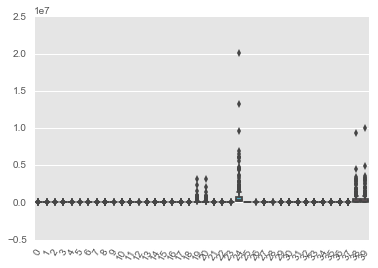

In [192]:
box_plot(df)

other seaborn boxplots

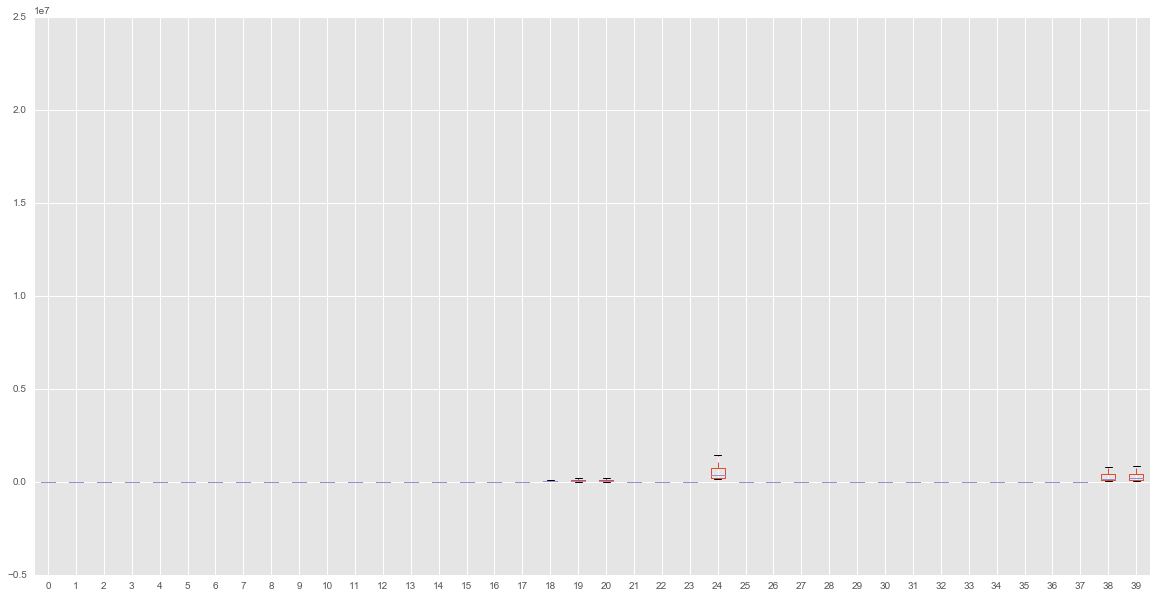

In [193]:
## this gives functions with speciications of graph size
df.plot(kind = 'box', figsize=(20,10)) 

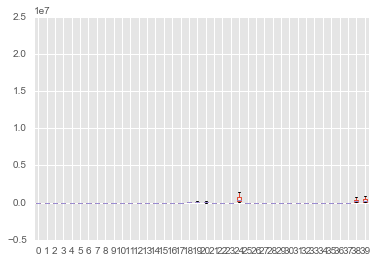

In [194]:
df.plot.box()

### Visualization using Subsets of total features
* subset data for cleaner graphs
* Nans data to white space
* converted all to numeric
* imputed data using imputer from scikitlearn and mean
* then boxplots and violin plots


#### SUBSET #1 
* unscaled data
* picked random features
* boxplots and violin plots

In [50]:
features1 = df[['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014']]

In [51]:
features1.head()

,population,total_crime_rate,rent_burden,mortgage_burden,income_change_2012_to_2014
0,20092883,1981.3,22.920705,46.163481,4.82011
1,13262220,2419.3,25.957630,44.954886,5.66255
2,9553810,2515.5,19.286340,34.462158,3.94357
3,6954003,3369.3,19.129850,31.123803,4.52295
4,6490180,3775.5,18.717539,30.603276,7.44411


In [52]:
features1= features1.replace(np.nan,' ', regex=True)


In [53]:
features1 = features1.convert_objects(convert_numeric=True)

/Users/kbelita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [54]:
features1.head()

,population,total_crime_rate,rent_burden,mortgage_burden,income_change_2012_to_2014
0,20092883,1981.3,22.920705,46.163481,4.820106
1,13262220,2419.3,25.957630,44.954886,5.662552
2,9553810,2515.5,19.286340,34.462158,3.943572
3,6954003,3369.3,19.129850,31.123803,4.522948
4,6490180,3775.5,18.717539,30.603276,7.444107


In [55]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
featimp1 = imp.fit_transform(features1)
features1 = pd.DataFrame(featimp1) 


In [125]:
features.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014']

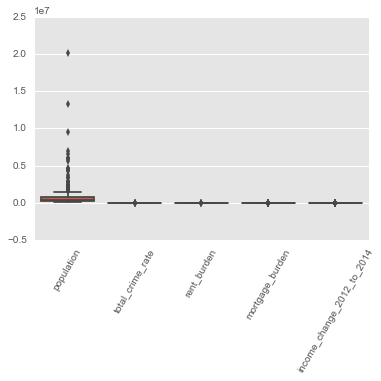

In [126]:
box_plot(features1)


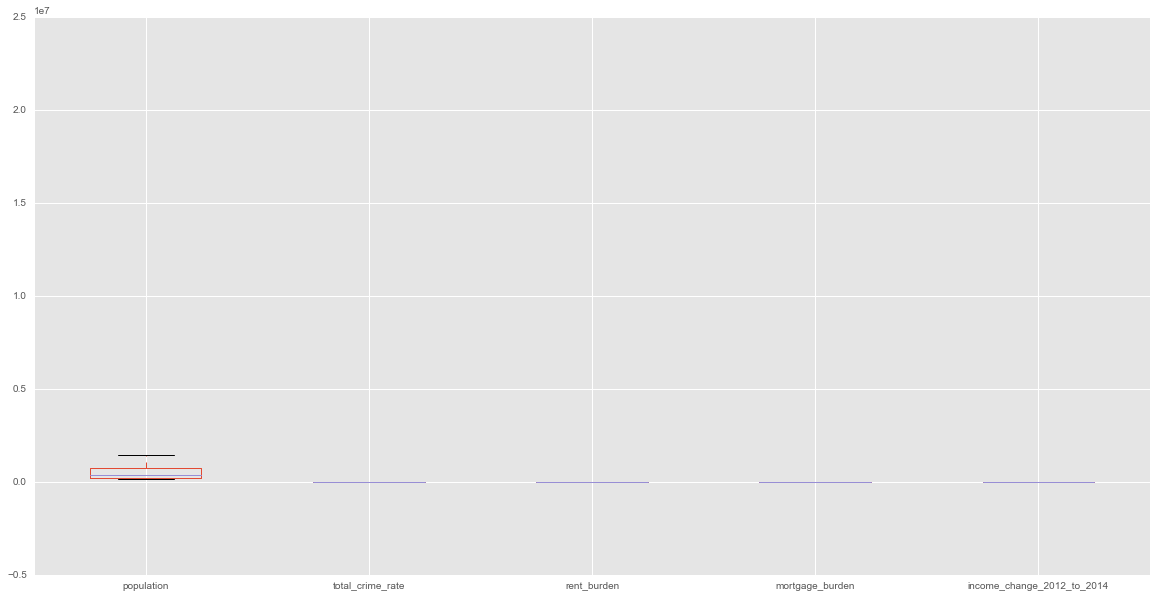

In [127]:
features1.plot(kind = 'box', figsize=(20,10))

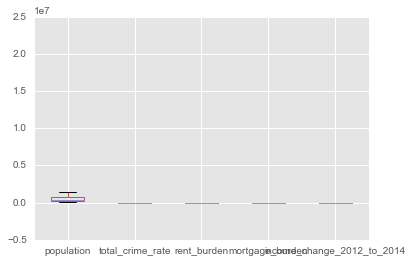

In [128]:
features1.plot.box()

#### SUBSET #1 - explored scaling and normalizing
* box plots and violin plots
* explore what scaling data and normalizing data does to the plots
* data ran through standard scaler from scikitlearn
* data ran through robust scaler - this is for sparse data
* data ran through minmax scaler - put data between 0 and 1
* normalizer - unit norm for samples

##### Standard Scaler


In [89]:
standard_scaler = StandardScaler()
feat1x= standard_scaler.fit_transform(features1)  ## turns into scaled array
stdfeatures1x = pd.DataFrame(feat1x) ## make array pd again


In [129]:
stdfeatures1x.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014']

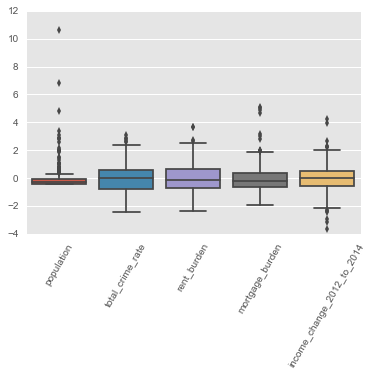

In [130]:
box_plot(stdfeatures1x)

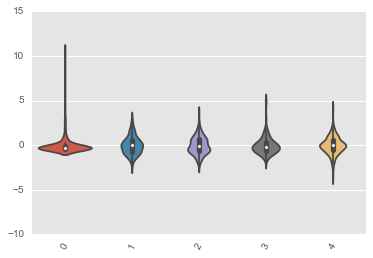

In [91]:
violin_plot(stdfeatures1x)

##### robust scaler

In [92]:
robust_scaler = RobustScaler()
feat1y = robust_scaler.fit_transform(features1)
stdfeatures1y = pd.DataFrame(feat1y)


In [131]:
stdfeatures1y.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014']

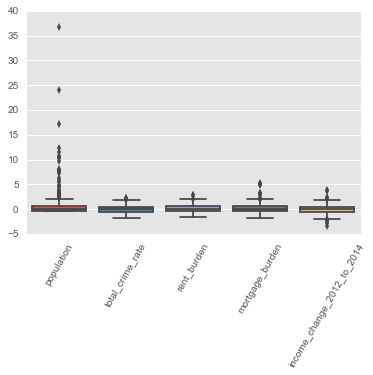

In [132]:
box_plot(stdfeatures1y) 

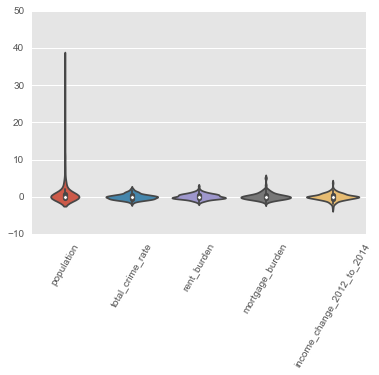

In [133]:
violin_plot(stdfeatures1y) 

##### min max scaler

In [95]:
min_max_scaler = MinMaxScaler()
feat1z = min_max_scaler.fit_transform(features1)
stdfeatures1z = pd.DataFrame(feat1z)

##mix max scalerputs data in between 0 to 1 preserving data with 0

In [134]:
stdfeatures1z.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014']

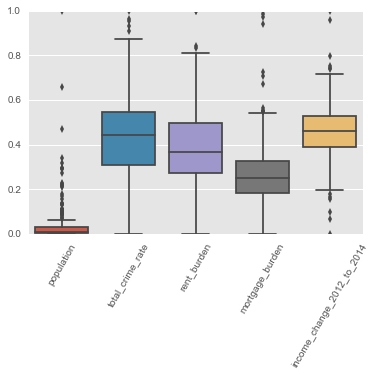

In [135]:
box_plot(stdfeatures1z)

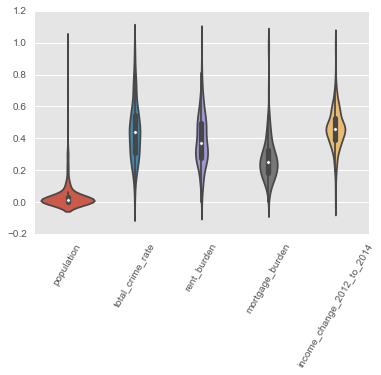

In [136]:
violin_plot(stdfeatures1z)

##### normalizer

In [99]:
normalizer = Normalizer()
feat1n = normalizer.fit_transform(features1)
stdfeatures1n = pd.DataFrame(feat1n)


In [137]:
stdfeatures1n.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014']

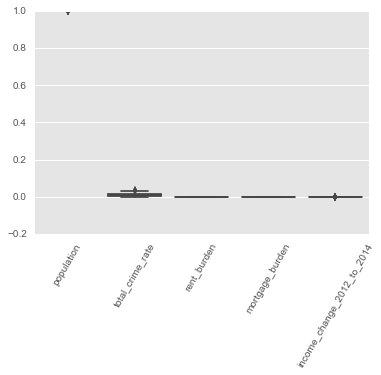

In [138]:
box_plot(stdfeatures1n) ## like it shows ont here 0  is population and is way above the others


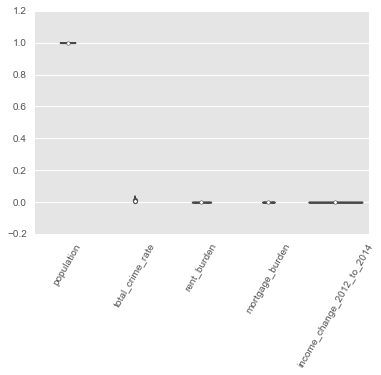

In [139]:
violin_plot(stdfeatures1n) ## like it shows ont here 0  is population and is way above the others


#### SUBSET #2
* original features picked before deciding using 40 features ingested
* unscaled
* boxplots and violin plots

In [140]:
features2 = df[['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014',
                'ratio_of_single_men_to_single_women',
                'unemploymentrate','employment','walk_score',
                'edu_average_scale_score', 'pct_laccess_pop10']]


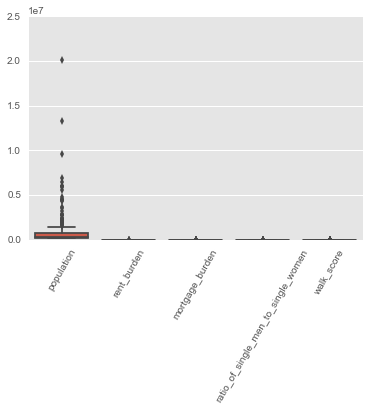

In [141]:
box_plot(features2)

In [142]:
## all Nans to white space
features2 = features2.replace(np.nan,' ', regex=True)
##convert to all floats
features2 = features2.convert_objects(convert_numeric=True)
##imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
featimp2 = imp.fit_transform(features2)
features2 = pd.DataFrame(featimp2) 

/Users/kbelita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [143]:
features2.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014',
                'ratio_of_single_men_to_single_women',
                'unemploymentrate','employment','walk_score',
                'edu_average_scale_score', 'pct_laccess_pop10']

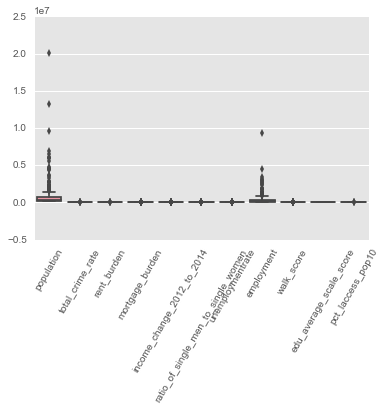

In [144]:
box_plot(features2)

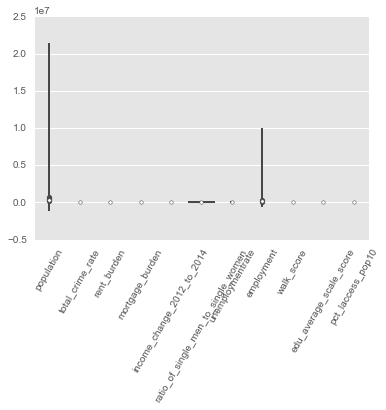

In [124]:
violin_plot(features2)

##### SUBSET #2-explored scaling

* box plots and violin plots
* explore what scaling data and normalizing data does to the plots
* data ran through standard scaler from scikitlearn
* data ran through robust scaler - this is for sparse data
* data ran through minmax scaler - put data between 0 and 1
* normalizer - unit norm for samples

In [112]:
standard_scaler = StandardScaler()
feat2x= standard_scaler.fit_transform(features2)  ## turns into scaled array
stdfeatures2x = pd.DataFrame(feat2x) ## make array pd again

## same as just calling scale(features1)

In [145]:
stdfeatures2x.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014',
                'ratio_of_single_men_to_single_women',
                'unemploymentrate','employment','walk_score',
                'edu_average_scale_score', 'pct_laccess_pop10']

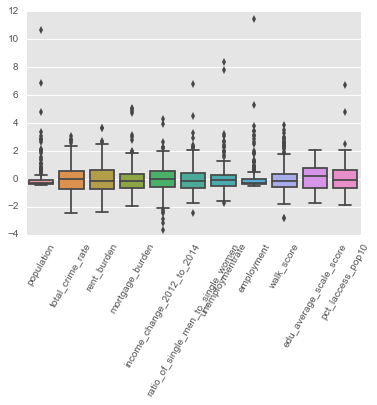

In [146]:
box_plot(stdfeatures2x)

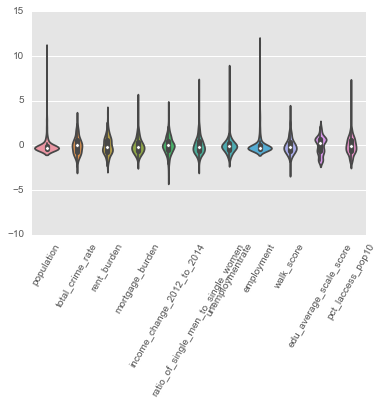

In [147]:
violin_plot(stdfeatures2x)

In [148]:
min_max_scaler = MinMaxScaler()
feat2z = min_max_scaler.fit_transform(features2)
stdfeatures2z = pd.DataFrame(feat2z)

In [149]:
stdfeatures2z.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014',
                'ratio_of_single_men_to_single_women',
                'unemploymentrate','employment','walk_score',
                'edu_average_scale_score', 'pct_laccess_pop10']

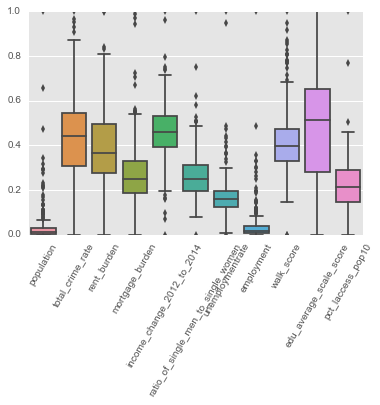

In [150]:
box_plot(stdfeatures2z)

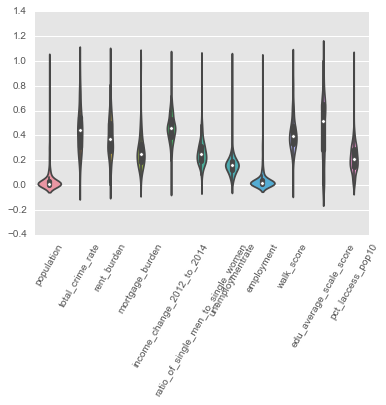

In [151]:
violin_plot(stdfeatures2z)

#### SUBSET #3
* pick 3 features only
* unscaled
* boxplots and violin plots and bubble plots

In [152]:
features3 = df[['population', 
                'income_change_2012_to_2014',
                 'unemploymentrate']]


In [153]:
features3.head()

,population,income_change_2012_to_2014,unemploymentrate
0,20092883,4.82011,6.4
1,13262220,5.66255,
2,9553810,3.94357,7.1
3,6954003,4.52295,5
4,6490180,7.44411,5


In [154]:
## all Nans to white space
features3 = features3.replace(np.nan,' ', regex=True)
##convert to all floats
features3 = features3.convert_objects(convert_numeric=True)

##imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
featimp3 = imp.fit_transform(features3)
features3 = pd.DataFrame(featimp3) 

/Users/kbelita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [155]:
features3.columns = ['population', 'income change', 'unemployment rate']

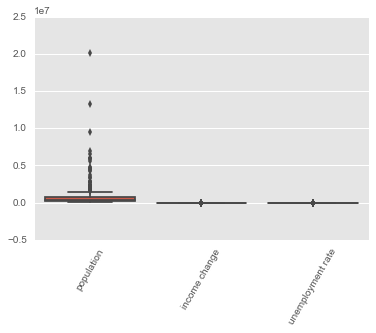

In [158]:
box_plot(features3)
                

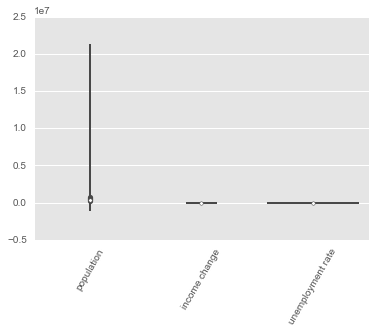

In [159]:
violin_plot(features3)

bubble plots

In [169]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd


py.sign_in('kvb24', '575qzlllk8')

bubble1 = plt.figure()

cf.set_config_file(offline=False, world_readable=True, theme='pearl')


features3.iplot(kind='bubble', x= 'unemployment rate', y='income change', size= 'population', 
             xTitle='unemployment Rate', yTitle='Income Change',
             filename='features3bubble')



##### standard scaler bubble plots


In [162]:
standard_scaler = StandardScaler()
feat3x= standard_scaler.fit_transform(features3)  ## turns into scaled array
stdfeatures3x = pd.DataFrame(feat3x) ## make` array pd again

In [167]:
stdfeatures3x.head()

,population,income change,unemployment rate
0,10.635585,0.034318,3.785145e-02
1,6.852507,0.199249,-4.191248e-16
2,4.798650,-0.137285,3.681762e-01
3,3.358779,-0.023858,-6.227981e-01
4,3.101897,0.548034,-6.227981e-01


In [163]:
stdfeatures3x.columns = ['population', 'income change', 'unemployment rate']

In [170]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd


py.sign_in('kvb24', '575qzlllk8')

bubbles_mpl = plt.figure()

cf.set_config_file(offline=False, world_readable=True, theme='pearl')


stdfeatures3x.iplot(kind='bubble', x= 'unemployment rate', y='income change', size= 'population', 
             xTitle='Unemployment Rate', yTitle='Income Change',
             filename='stdfeatures3xbubble')


#####  Min Max Scaler bubble plots



In [172]:
min_max_scaler = MinMaxScaler()
feat3z = min_max_scaler.fit_transform(features3)
stdfeatures3z = pd.DataFrame(feat3z)

In [173]:
stdfeatures3z.columns = ['population', 'income change', 'unemployment rate']

In [175]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd


py.sign_in('kvb24', '575qzlllk8')

bubbles_mpl = plt.figure()

cf.set_config_file(offline=False, world_readable=True, theme='pearl')


stdfeatures3z.iplot(kind='bubble', x= 'unemployment rate', y='income change', size= 'population', 
             xTitle='unemployment Rate', yTitle='Income Change',
             filename='stdfeatures3zbubble')


##### SUBSET #3 only top 50 MSAs

In [176]:
features3_50 = features3.head(50)

In [177]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd


py.sign_in('kvb24', '575qzlllk8')

bubbles_mpl = plt.figure()

cf.set_config_file(offline=False, world_readable=True, theme='pearl')


features3_50.iplot(kind='bubble', x= 'unemployment rate', y='income change', size= 'population', 
             xTitle='unemployment Rate', yTitle='Income Change',
             filename='features3_50bubble')


In [179]:
features3_50.head()

,population,income change,unemployment rate
0,20092883.0,4.820106,6.400000
1,13262220.0,5.662552,6.319788
2,9553810.0,3.943572,7.100000
3,6954003.0,4.522948,5.000000
4,6490180.0,7.444107,5.000000


#### Subset #4
* random features
* unscaled
* boxplots and violin plots and bubble plots



In [180]:
features4 = df[['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014',
                'ratio_of_single_men_to_single_women',
                'median_household_income',
                'unemploymentrate','employment','walk_score',
                'edu_average_scale_score', 'pct_laccess_pop10']]


In [181]:
features4.tail()

,population,total_crime_rate,rent_burden,mortgage_burden,income_change_2012_to_2014,ratio_of_single_men_to_single_women,median_household_income,unemploymentrate,employment,walk_score,edu_average_scale_score,pct_laccess_pop10
295,143867,2845.2,18.768069,32.187600,-1.14126,1.311722,49808,3.5,68864,29.0,239.723,35.3458
296,143140,3646.4,23.742433,34.936709,-0.318192,1.038766,36340,7.2,58209,30.0,236.453,8.34228
297,142952,2964,18.979383,30.706244,24.8828,1.377455,41034,8.2,55625,31.0,236.453,14.3011
298,141667,2055.4,23.474495,36.150722,8.1251,1.324518,74123,5.7,69667,45.0,231.549,14.1427
299,139723,,18.732302,31.017208,5.55641,1.089230,41319,7.2,57837,21.0,234.243,11.3209


In [182]:

## all Nans to white space
features4 = features4.replace(np.nan,' ', regex=True)
##convert to all floats
features4 = features4.convert_objects(convert_numeric=True)
##imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
featimp4 = imp.fit_transform(features4)
features4 = pd.DataFrame(featimp4) 

/Users/kbelita/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [183]:
features4.columns = ['population', 
                'total_crime_rate', 
                'rent_burden','mortgage_burden',
                'income_change_2012_to_2014',
                'ratio_of_single_men_to_single_women',
                'median_household_income',
                'unemploymentrate','employment','walk_score',
                'edu_average_scale_score', 'pct_laccess_pop10']

In [184]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd


py.sign_in('kvb24', '575qzlllk8')

bubbles_mpl = plt.figure()

cf.set_config_file(offline=False, world_readable=True, theme='pearl')


features4.iplot(kind='bubble', x= 'median_household_income', y='rent_burden', size= 'population', 
             xTitle='median household income', yTitle='Rent Burden',
             filename='features3bubble')

#### SUBSET #4 - Only Top 50 MSAs
* unscaled
* bubble plots
* pairgrid
* joint plot

In [187]:
features4_50 = features4.head(50)

In [186]:
import plotly.plotly as py
import cufflinks as cf
import pandas as pd


py.sign_in('kvb24', '575qzlllk8')

bubbles_mpl = plt.figure()

cf.set_config_file(offline=False, world_readable=True, theme='pearl')


features4_50.iplot(kind='bubble', x= 'median_household_income', y='rent_burden', size= 'population', 
             xTitle='median household income', yTitle='Rent Burden',
             filename='features3bubble')

##### PAIR GRID FOR FEATURES

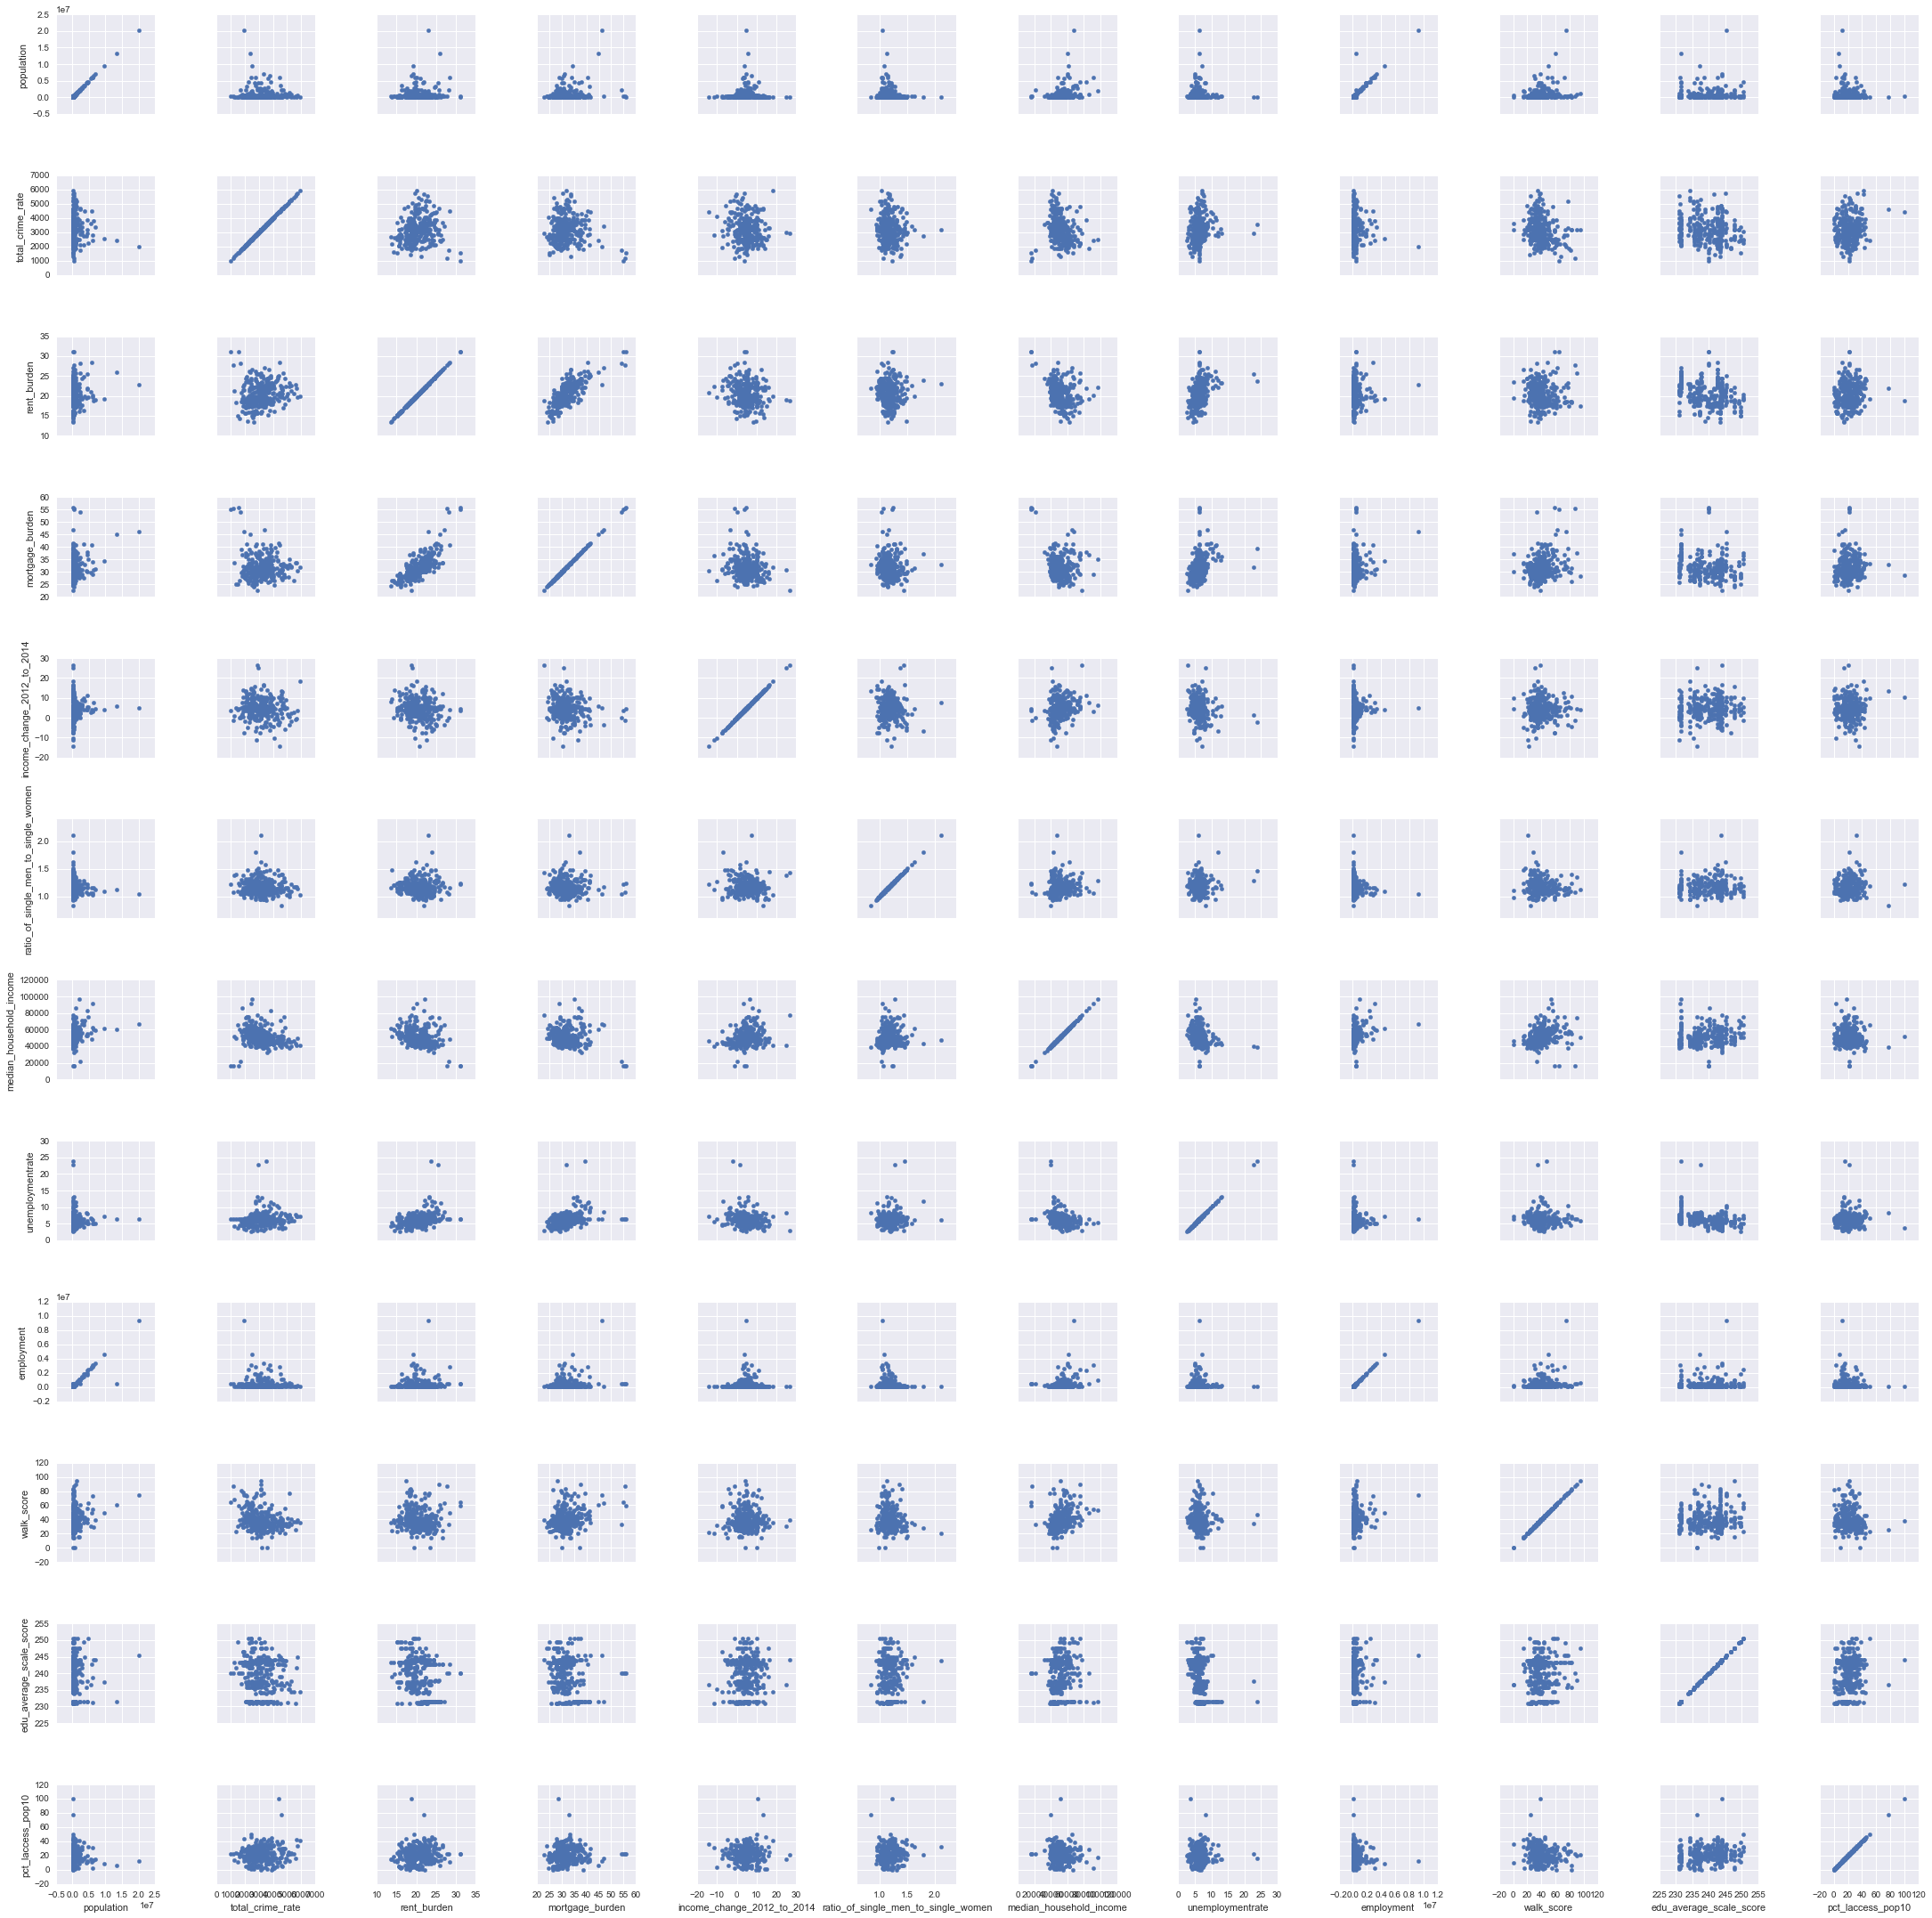

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

g = sns.PairGrid(features4)
g = g.map(plt.scatter)

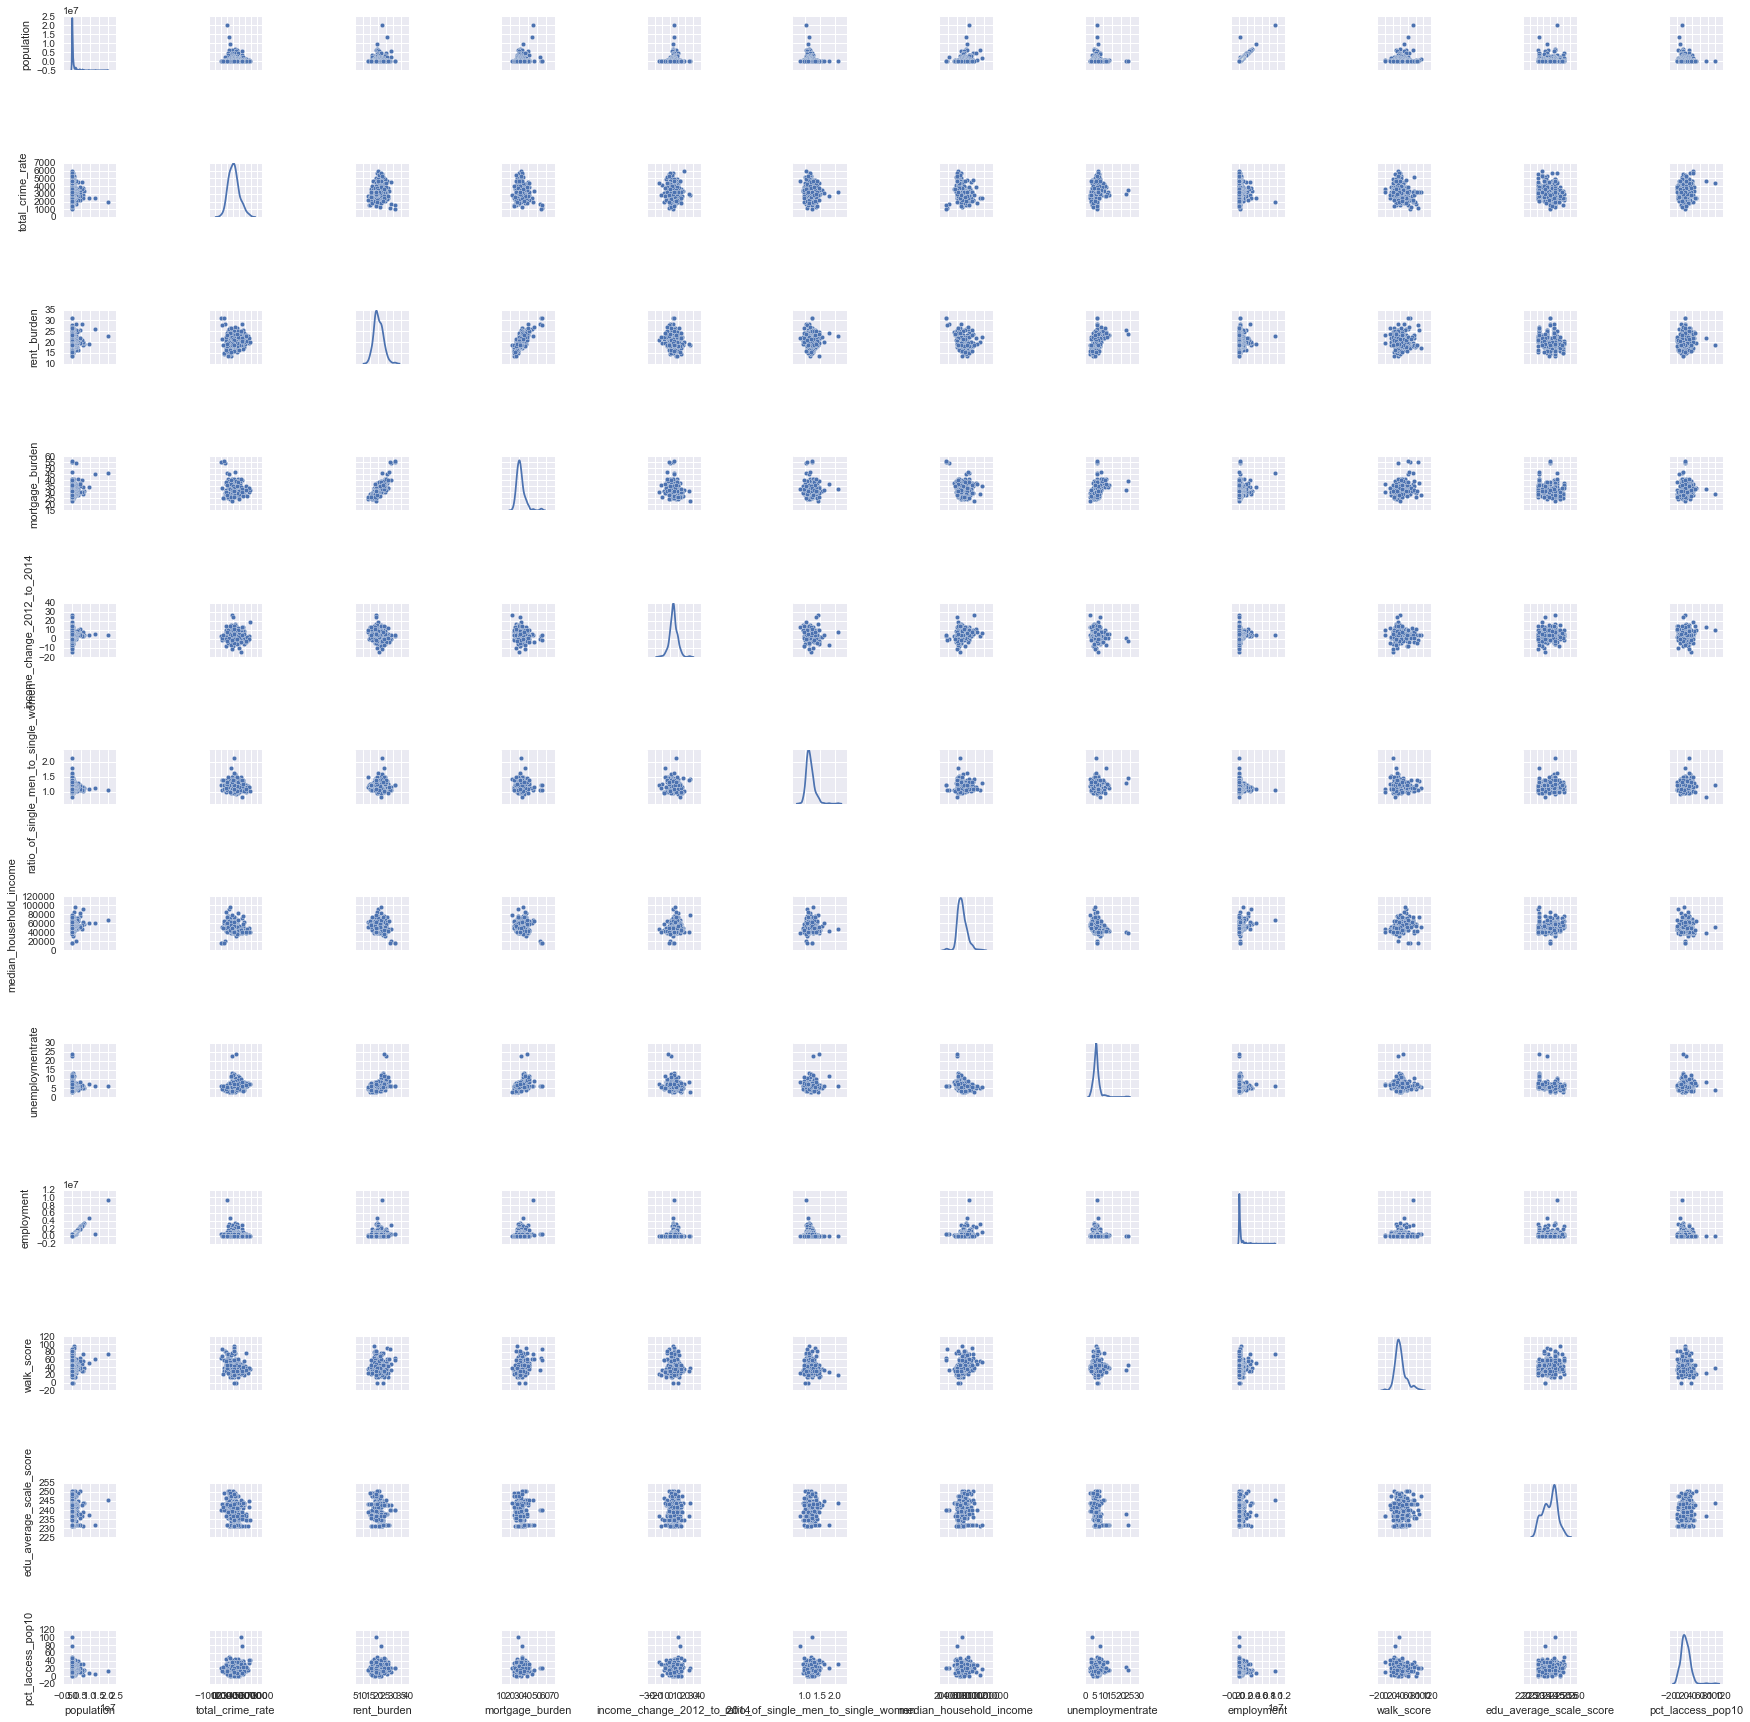

In [204]:
def splom_viz(df, labels=None): ##cite rebecca
    ax = sns.pairplot(df, hue=labels, diag_kind='kde', size=2)
    plt.show()

splom_viz(features4)


##### JOINT PLOT 

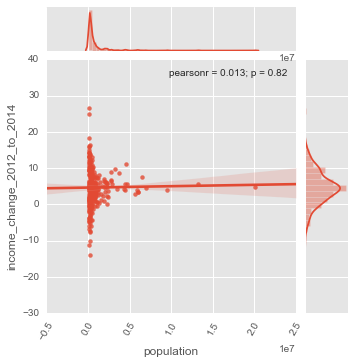

In [188]:
def joint_viz(feat1,feat2,df): ## cite rebecca
    ax = sns.jointplot(feat1, feat2, data=df, kind='reg', size=5)
    plt.xticks(rotation=60)
    plt.show()

joint_viz('population','income_change_2012_to_2014',features4)